In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

## Load and manipulate data

In [10]:
## We do some preprocessing as the MLY data was calculated seperately
dataset_noMLY = pd.read_csv("./Binding_DDG_summary.csv")
dataset_MLY = pd.read_csv("./Binding_DDG_summary_MLY.csv")

In [11]:
dataset_MLY["AA"] = dataset_MLY["Mutation"].astype(str).str[2:-1].astype(int)
dataset_MLY["From"] = dataset_MLY["Mutation"].astype(str).str[:1]
dataset_MLY["To"] = dataset_MLY["Mutation"].astype(str).str[-1:]

In [12]:
dataset_MLY.head()

,Mutation,WT_energy,MUT_energy,DDG,AA,From,To
0,mB207A,-10.8857,-10.5385,0.3472,207,m,A
1,mB207C,-10.8857,-10.5426,0.3431,207,m,C
2,mB207D,-10.8857,-10.0572,0.8285,207,m,D
3,mB207E,-10.8857,-10.2886,0.5971,207,m,E
4,mB207F,-10.8857,-10.7830,0.1027,207,m,F


In [13]:
dataset_MLY["From"] = "K"
dataset_MLY_no_K = dataset_MLY[dataset_MLY["To"] != "K"]
dataset_MLY_K = dataset_MLY[dataset_MLY["To"] == "K"]

dataset_MLY_K["DDG"] = 0

dataset_MLY_mod = pd.concat([dataset_MLY_K, dataset_MLY_no_K])

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_12773/1026764866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_MLY_K["DDG"] = 0


In [14]:
dataset_MLY_mod.head()

,Mutation,WT_energy,MUT_energy,DDG,AA,From,To
8,mB207K,-10.8857,-11.0102,0.0000,207,K,K
28,mB218K,-10.8857,-10.8910,0.0000,218,K,K
48,mB329K,-10.8857,-10.9675,0.0000,329,K,K
0,mB207A,-10.8857,-10.5385,0.3472,207,K,A
1,mB207C,-10.8857,-10.5426,0.3431,207,K,C


In [16]:
dataset_noMLY["AA"] = dataset_noMLY["Mutation"].astype(str).str[2:-1].astype(int)
dataset_noMLY["From"] = dataset_noMLY["Mutation"].astype(str).str[:1]
dataset_noMLY["To"] = dataset_noMLY["Mutation"].astype(str).str[-1:]

In [18]:
dataset = pd.concat([dataset_noMLY, dataset_MLY_mod])

In [19]:
pivot_table = dataset[["DDG", "AA", "To"]].pivot(columns= "AA", index = "To")
pivot_table = pivot_table.fillna(0)

## Subset to residues near finger and thumb and plot heatmap

In [20]:
thumbdomain = dataset[dataset["AA"] >= 205]
thumbdomain = thumbdomain[thumbdomain["AA"] <= 220]

thumbdomain = thumbdomain.sort_values(by = "AA")

pivot_table = thumbdomain[["DDG", "AA", "To"]].pivot(columns= "AA", index = "To")
pivot_table = pivot_table.fillna(0)

residuelist = pivot_table.columns.get_level_values('AA').tolist()

labels = thumbdomain[thumbdomain["AA"].isin(residuelist)].drop_duplicates(subset = "AA")[["AA","From"]]

labels_AA = labels["AA"]
labels_AA = [str(x) for x in labels_AA]
labels_from = labels["From"]

labels = (labels_from + labels_AA).tolist()

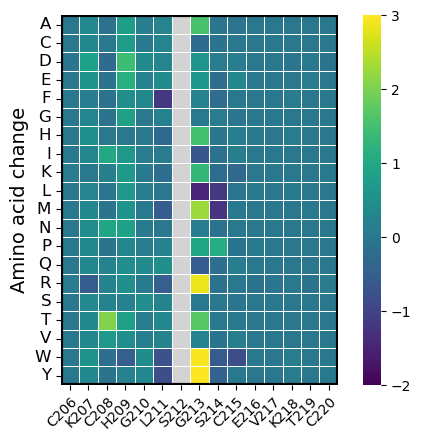

In [21]:
mask = np.zeros((pivot_table.shape))
mask[:,6] = True

cmap = matplotlib.colormaps.get_cmap('viridis')
cmap.set_bad("lightgrey")

g = sns.heatmap(pivot_table, vmin = -2, vmax = 3, square=True, cmap = cmap, linewidths=0.5, mask = mask)

g.set_xlabel("")
g.set_ylabel("Amino acid change", size = 14)
g.set_xticklabels(labels, rotation = 45, ha = "right", size = 10, rotation_mode = "anchor")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, size = 12)

g.axhline(y=0, color='k',linewidth=3)
g.axhline(y=pivot_table.shape[0], color='k',linewidth=3)
g.axvline(x=0, color='k',linewidth=3)
g.axvline(x=pivot_table.shape[1], color='k',linewidth=3)

plt.savefig("Thumb_heatmap.pdf")

In [22]:
fingerdomain = dataset[dataset["AA"] >= 327]
fingerdomain = fingerdomain[fingerdomain["AA"] <= 344]
fingerdomain = fingerdomain.sort_values(by = "AA")

In [23]:
fingerdomain["Label"] = fingerdomain["From"] + fingerdomain["AA"].astype(str)

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_12773/4004324217.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c_bar.set_ticklabels(["< -2", -1, 0, 1, 2, "> 3"])


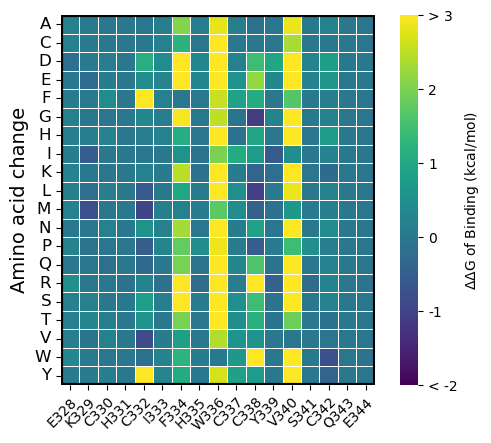

In [24]:
finger_pivot_table = fingerdomain[["DDG", "AA", "To"]].pivot(columns= "AA", index = "To")
finger_pivot_table = finger_pivot_table.fillna(0)

residuelist = finger_pivot_table.columns.get_level_values('AA').tolist()

labels = fingerdomain[fingerdomain["AA"].isin(residuelist)].drop_duplicates(subset = "AA")[["AA","From"]]
labels_AA = labels["AA"]
labels_AA = [str(x) for x in labels_AA]
labels_from = labels["From"]

labels = (labels_from + labels_AA).tolist()


g = sns.heatmap(finger_pivot_table, vmin = -2, vmax = 3, square=True, cmap="viridis", linewidth = 0.5
               ,cbar_kws={'label': r'$\Delta\Delta$G of Binding (kcal/mol)'})


g.set_xlabel("")
g.set_ylabel("Amino acid change", size = 14)
g.set_xticklabels(labels, rotation = 45, ha = "right", size = 10, rotation_mode = "anchor")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, size = 12)

g.axhline(y=0, color='k',linewidth=3)
g.axhline(y=finger_pivot_table.shape[0], color='k',linewidth=3)
g.axvline(x=0, color='k',linewidth=3)
g.axvline(x=finger_pivot_table.shape[1], color='k',linewidth=3)

c_bar = g.collections[0].colorbar
c_bar.set_ticklabels(["< -2", -1, 0, 1, 2, "> 3"])

plt.savefig("Finger_heatmap.pdf")